In [1]:
# Author : Mushtaq Khan
# Unit  : IFN 701
# Supervisor : Dr. Ashish Bhaskar
# Date modified : 20-05-2019 01:03:00 pm

In [5]:
# # Installing all the required packages 
# !pip install numpy
# !pip install pandas
# !pip install matplotlib.pyplot
# # Include the steps for this package
# !pip install mpl_toolkits.basemap # problematic - document the instructions

In [6]:
# Importing the required libraries 
import numpy as np
import pandas as pd

# Visualisation
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Ignore warnings
import warnings; warnings.simplefilter('ignore')

In [7]:
%%time
# Prints the time taken to execute the block

# Importing the csv file into a pandas dataframe
df = pd.read_csv("bluetooth_2017apr.csv", sep=";", index_col=0, low_memory=False)

# Converting the date column to data-time format 
df['entered'] = pd.to_datetime(df['entered'], format = '%Y-%m-%d %H:%M:%S')

# Sorting by device ids and entered
df = df.sort_values(['deviceid', 'entered'])

# Working with a single day (April 1st)
df.set_index('entered', inplace=True)

# Narrowing the scope down to one day (i.e. 29th April) from 7 am to 10 am
day1_df = df['2017-04-29 07:00:00': '2017-04-29 09:00:00']

CPU times: user 7.78 s, sys: 1.16 s, total: 8.94 s
Wall time: 9.01 s


In [8]:
# Examining the dataframe
print(day1_df.head())

print(day1_df.shape)

# Checking the number of sensors
day1_df['areaid'].nunique()

                     deviceid  areaid  duration
entered                                        
2017-04-29 07:04:07        76   10464        59
2017-04-29 07:04:56        76   10723        20
2017-04-29 07:02:41       264   10127        20
2017-04-29 07:02:47       264   10159         1
2017-04-29 07:03:06       264   10159         1
(196871, 3)


909

In [9]:
# Reading all the headers into a list
dfCol = df.columns

print(dfCol)
# print(df['entered'][1].day)
# df = df.set_index(pd.DatetimeIndex(df['entered']))

Index(['deviceid', 'areaid', 'duration'], dtype='object')


In [10]:
# Reading the Dataframe that contains the coordinates
df2 = pd.read_csv('coordinates.csv', sep=",")

# Loading the Zone IDs:
df_zones = pd.read_csv('BMS_ZoneIDs.csv')

# Before pre-processing
df2.tail()

,BMS-ID,AreaNum,OwnerCode,LocationID,ID,X,Y,AMGX,AMGY,GrpNum,...,at,atd,volocc,at_st,at_fi,lcmVers,IntGrpNo,Approaches,Patching,Cost
1203,260031,AVT031,NaN,18225,18225,153.032507,-27.446946,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,260032,AVT032,NaN,18227,18227,153.032679,-27.446803,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205,260033,AVT033,NaN,18228,18228,153.032926,-27.446879,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,260034,AVT034,NaN,18229,18229,153.032314,-27.445489,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1207,260035,AVT035,NaN,18230,18230,153.032539,-27.444775,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Reading column names of the second dataframe 
df2_col = df2.columns
df2_col

# Eliminating all the columns except for the column with the key value (ie. BMS-ID) and the geo coordinates
for feature in df2_col:
    if feature not in ['BMS-ID', 'X', 'Y']:
        df2.drop([feature], axis=1, inplace=True)

# Renaming BMS-ID to areaid to match the first dataframe
df2.columns = ['areaid', 'X', 'Y']

# Examining the dataset after changes
df2.head()

,areaid,X,Y
0,10001,153.020600,-27.467900
1,10002,153.022077,-27.469399
2,10003,153.023736,-27.468108
3,10004,153.025435,-27.466789
4,10005,153.026305,-27.466121


In [12]:
# Merging the values from the two datasets
df = day1_df.join(df2.set_index('areaid'), on='areaid')

# Adding the index column back
# Reset the index
df = df.reset_index()

# Merging the Zone Ids into the main dataframe
df = df.join(df_zones.set_index('areaid'), on='areaid')

# Adding the index column back
# Reset the index
# df = df.reset_index()
 
df.head(5)

,entered,deviceid,areaid,duration,X,Y,SA1,SA2,SA2_N,SA3,SA3_N,SA4,SA4_N
0,2017-04-29 07:04:07,76,10464,59,152.981049,-27.524879,3109201.0,304031092.0,'Chelmer - Graceville',30403.0,'Sherwood - Indooroopilly',304.0,'Brisbane - West'
1,2017-04-29 07:04:56,76,10723,20,152.977388,-27.524346,3109201.0,304031092.0,'Chelmer - Graceville',30403.0,'Sherwood - Indooroopilly',304.0,'Brisbane - West'
2,2017-04-29 07:02:41,264,10127,20,152.994138,-27.491934,3109601.0,304031096.0,'St Lucia',30403.0,'Sherwood - Indooroopilly',304.0,'Brisbane - West'
3,2017-04-29 07:02:47,264,10159,1,152.993805,-27.489740,3109701.0,304031097.0,'Taringa',30403.0,'Sherwood - Indooroopilly',304.0,'Brisbane - West'
4,2017-04-29 07:03:06,264,10159,1,152.993805,-27.489740,3109701.0,304031097.0,'Taringa',30403.0,'Sherwood - Indooroopilly',304.0,'Brisbane - West'


In [13]:
# Re-selecting the columns
dfCol = df.columns
dfCol = list(dfCol)

# Drop the deviceid column
del dfCol[1]

# for feature in dfCol:
#     print(df.groupby(df['deviceid'])[feature].unique())

# Creating the new dataframe to store the sorted unique results
df3 = pd.DataFrame()

for feature in dfCol:
    df3[feature] = df.groupby(df['deviceid'])[feature].unique()

# CHANGE - If any duplicates found, some error message 
# VOILA
df3 = df3.reset_index()
df3.head()

,deviceid,entered,areaid,duration,X,Y,SA1,SA2,SA2_N,SA3,SA3_N,SA4,SA4_N
0,76,"[2017-04-29T07:04:07.000000000, 2017-04-29T07:...","[10464, 10723]","[59, 20]","[152.981049, 152.977388]","[-27.524879, -27.524346]",[3109201.0],[304031092.0],['Chelmer - Graceville'],[30403.0],['Sherwood - Indooroopilly'],[304.0],['Brisbane - West']
1,264,"[2017-04-29T07:02:41.000000000, 2017-04-29T07:...","[10127, 10159, 18083, 10264, 10181, 10364, 102...","[20, 1, 39, 21, 59]","[152.994138, 152.993805, 152.993539, 152.99222...","[-27.491934000000004, -27.48974, -27.48848, -2...","[3109601.0, 3109701.0, 3113701.0, 3113501.0, 3...","[304031096.0, 304031097.0, 305041137.0, 305041...","['St Lucia', 'Taringa', 'Toowong', 'Paddington...","[30403.0, 30504.0, 30501.0, 30503.0, 30203.0]","['Sherwood - Indooroopilly', 'Brisbane Inner -...","[304.0, 305.0, 302.0]","['Brisbane - West', 'Brisbane Inner City', 'Br..."
2,359,[2017-04-29T07:35:05.000000000],[10331],[1],[153.04040600000002],[-27.400565000000004],[3103101.0],[302021031.0],['Kedron - Gordon Park'],[30202.0],['Chermside'],[302.0],['Brisbane - North']
3,386,"[2017-04-29T07:37:32.000000000, 2017-04-29T07:...","[10727, 10705, 10709, 10596, 10870, 10881, 10904]","[20, 1, 40]","[153.093349, 153.07836799999998, 153.073897, 1...","[-27.617539, -27.613484999999997, -27.61223900...","[3107301.0, 3107801.0, 3108001.0, 3107501.0]","[303051073.0, 303061078.0, 303061080.0, 303051...","['Calamvale - Stretton', 'Runcorn', 'Sunnybank...","[30305.0, 30306.0]","['Rocklea - Acacia Ridge', 'Sunnybank']",[303.0],['Brisbane - South']
4,649,[2017-04-29T07:31:50.000000000],[10899],[20],[153.098599],[-27.606957],[3107701.0],[303061077.0],['Kuraby'],[30306.0],['Sunnybank'],[303.0],['Brisbane - South']


In [14]:
df4 = pd.DataFrame(columns=['Sensor Count', 'First Sensor', 'Last Sensor', 'First SA2 Zone', 'Last SA2 Zone'])

# For the purpose of FOR loops, length of the dataframe
n = df3.shape[0] # Row number

# Show me the first sensor of every car?
# Show me the last sensor of every car?
# Show me the sensor count of every car detection
for x in range(0,n):
    # print(FU['areaid'].iloc[x].size)
    df4.loc[x, ['Sensor Count']] = df3['areaid'].iloc[x].size
    df4.loc[x, ['First Sensor']] = df3['areaid'].iloc[x][0]
    df4.loc[x, ['Last Sensor']] = df3['areaid'].iloc[x][-1] 
    
    # Calculating the origin and destination SA2_N zones
    df4.loc[x, ['First SA2 Zone']] = df3['SA2'].iloc[x][0]
    df4.loc[x, ['Last SA2 Zone']] = df3['SA2'].iloc[x][-1] 


# VOILA 2.0
df4.head()

,Sensor Count,First Sensor,Last Sensor,First SA2 Zone,Last SA2 Zone
0,2,10464,10723,3.04031e+08,3.04031e+08
1,20,10127,10157,3.04031e+08,3.02031e+08
2,1,10331,10331,3.02021e+08,3.02021e+08
3,7,10727,10904,3.03051e+08,3.03051e+08
4,1,10899,10899,3.03061e+08,3.03061e+08


In [15]:
# Merging the titans
# Result
Result = pd.DataFrame()
Result = pd.concat([df3, df4], axis=1, sort=False)

# Exporting the result as a .csv file for readability
Result.to_csv("Result.csv")

# Voila 3.0
Result.head(35)

# CHANGE - reorder Sensor Count position to the front

,deviceid,entered,areaid,duration,X,Y,SA1,SA2,SA2_N,SA3,SA3_N,SA4,SA4_N,Sensor Count,First Sensor,Last Sensor,First SA2 Zone,Last SA2 Zone
0,76,"[2017-04-29T07:04:07.000000000, 2017-04-29T07:...","[10464, 10723]","[59, 20]","[152.981049, 152.977388]","[-27.524879, -27.524346]",[3109201.0],[304031092.0],['Chelmer - Graceville'],[30403.0],['Sherwood - Indooroopilly'],[304.0],['Brisbane - West'],2,10464,10723,3.04031e+08,3.04031e+08
1,264,"[2017-04-29T07:02:41.000000000, 2017-04-29T07:...","[10127, 10159, 18083, 10264, 10181, 10364, 102...","[20, 1, 39, 21, 59]","[152.994138, 152.993805, 152.993539, 152.99222...","[-27.491934000000004, -27.48974, -27.48848, -2...","[3109601.0, 3109701.0, 3113701.0, 3113501.0, 3...","[304031096.0, 304031097.0, 305041137.0, 305041...","['St Lucia', 'Taringa', 'Toowong', 'Paddington...","[30403.0, 30504.0, 30501.0, 30503.0, 30203.0]","['Sherwood - Indooroopilly', 'Brisbane Inner -...","[304.0, 305.0, 302.0]","['Brisbane - West', 'Brisbane Inner City', 'Br...",20,10127,10157,3.04031e+08,3.02031e+08
2,359,[2017-04-29T07:35:05.000000000],[10331],[1],[153.04040600000002],[-27.400565000000004],[3103101.0],[302021031.0],['Kedron - Gordon Park'],[30202.0],['Chermside'],[302.0],['Brisbane - North'],1,10331,10331,3.02021e+08,3.02021e+08
3,386,"[2017-04-29T07:37:32.000000000, 2017-04-29T07:...","[10727, 10705, 10709, 10596, 10870, 10881, 10904]","[20, 1, 40]","[153.093349, 153.07836799999998, 153.073897, 1...","[-27.617539, -27.613484999999997, -27.61223900...","[3107301.0, 3107801.0, 3108001.0, 3107501.0]","[303051073.0, 303061078.0, 303061080.0, 303051...","['Calamvale - Stretton', 'Runcorn', 'Sunnybank...","[30305.0, 30306.0]","['Rocklea - Acacia Ridge', 'Sunnybank']",[303.0],['Brisbane - South'],7,10727,10904,3.03051e+08,3.03051e+08
4,649,[2017-04-29T07:31:50.000000000],[10899],[20],[153.098599],[-27.606957],[3107701.0],[303061077.0],['Kuraby'],[30306.0],['Sunnybank'],[303.0],['Brisbane - South'],1,10899,10899,3.03061e+08,3.03061e+08
5,805,"[2017-04-29T08:12:38.000000000, 2017-04-29T08:...","[10763, 10861, 10817, 10866]","[58, 39, 20]","[153.156499, 153.15628600000002, 153.1575, 153...","[-27.451757, -27.453084000000004, -27.464388, ...","[3102101.0, 3101601.0]","[301031021.0, 301031016.0]","['Wynnum West - Hemmant', 'Manly West']",[30103.0],['Wynnum - Manly'],[301.0],['Brisbane - East'],4,10763,10866,3.01031e+08,3.01031e+08
6,890,"[2017-04-29T08:12:57.000000000, 2017-04-29T08:...","[10498, 10719, 10441, 10603, 10585, 10461, 104...","[78, 21, 20, 40, 39, 1, 59]","[153.01206299999998, 153.01684699999998, 153.0...","[-27.480937, -27.481640999999996, -27.482111, ...","[3111201.0, 3111001.0, 3110801.0, 3111501.0, 3...","[305011112.0, 305011110.0, 305011108.0, 305021...","['West End', 'South Brisbane', 'Kangaroo Point...","[30501.0, 30502.0, 30302.0]","['Brisbane Inner', 'Brisbane Inner - East', 'H...","[305.0, 303.0]","['Brisbane Inner City', 'Brisbane - South']",19,10498,10437,3.05011e+08,3.03021e+08
7,999,"[2017-04-29T07:01:52.000000000, 2017-04-29T07:...",[10166],"[1, 78]",[153.006793],[-27.45461],[3113601.0],[305041136.0],['Red Hill (Qld)'],[30504.0],['Brisbane Inner - West'],[305.0],['Brisbane Inner City'],1,10166,10166,3.05041e+08,3.05041e+08
8,1022,"[2017-04-29T08:46:35.000000000, 2017-04-29T08:...",[10526],"[1, 39]",[153.06007],[-27.531668],[3105701.0],[303021057.0],['Holland Park West'],[30302.0],['Holland Park - Yeronga'],[303.0],['Brisbane - South'],1,10526,10526,3.03021e+08,3.03021e+08
9,1058,"[2017-04-29T07:11:52.000000000, 2017-04-29T07:...","[10672, 173310, 179003, 10097, 10070, 10098, 1...","[1, 20, 59]","[153.034377, 153.034428, 153.022492, 153.03018...","[-27.503445000000003, -27.492602, -27.45662299...","[3105201.0, 3105801.0, 3112601.0, 3113001.0, 3...","[303021052.0, 303021058.0, 305031126.0, 305031...","['Annerley', 'Woolloongabba', 'Kelvin Grove - ...","[30302.0, 30503.0]","['Holland Park - Yeronga', 'Brisbane Inner - N...","[303.0, 305.0]","['Brisbane - South', 'Brisbane Inner City']",

In [16]:
Result.shape

# 44,811 cars over a period of 7 am to 10 am

(29858, 18)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


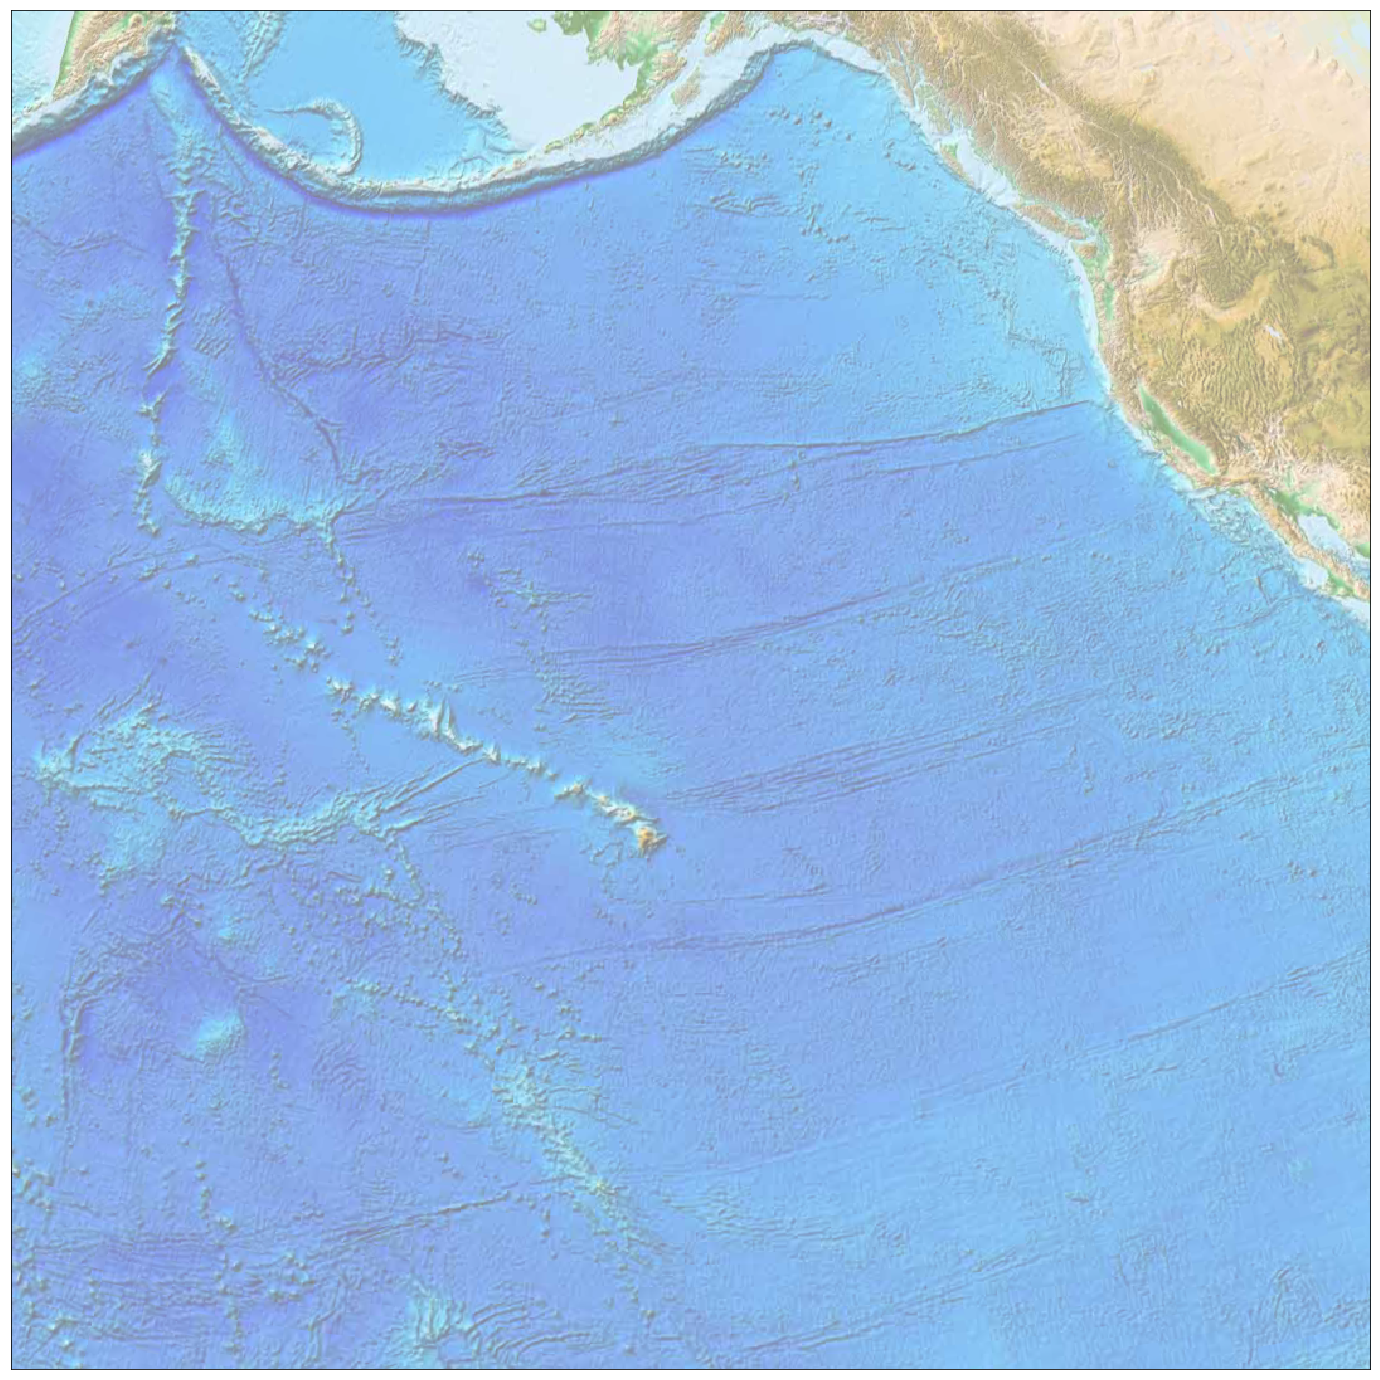

In [17]:
# # Plot testing
# plt.figure(figsize=(25,25))
# m = Basemap(projection='lcc', lat_0 =27.470505930696984, lon_0 =-153.03405761718747, width=8E6, height=8E6,resolution=None)
# m.etopo(scale=1, alpha=0.5)

# # m.drawcoastlines()
# # m.drawmapboundary(fill_color='cornflowerblue')
# # m.fillcontinents(color='whitesmoke')
# # m.fillcontinents()

IndexError: index 29 is out of bounds for axis 0 with size 29

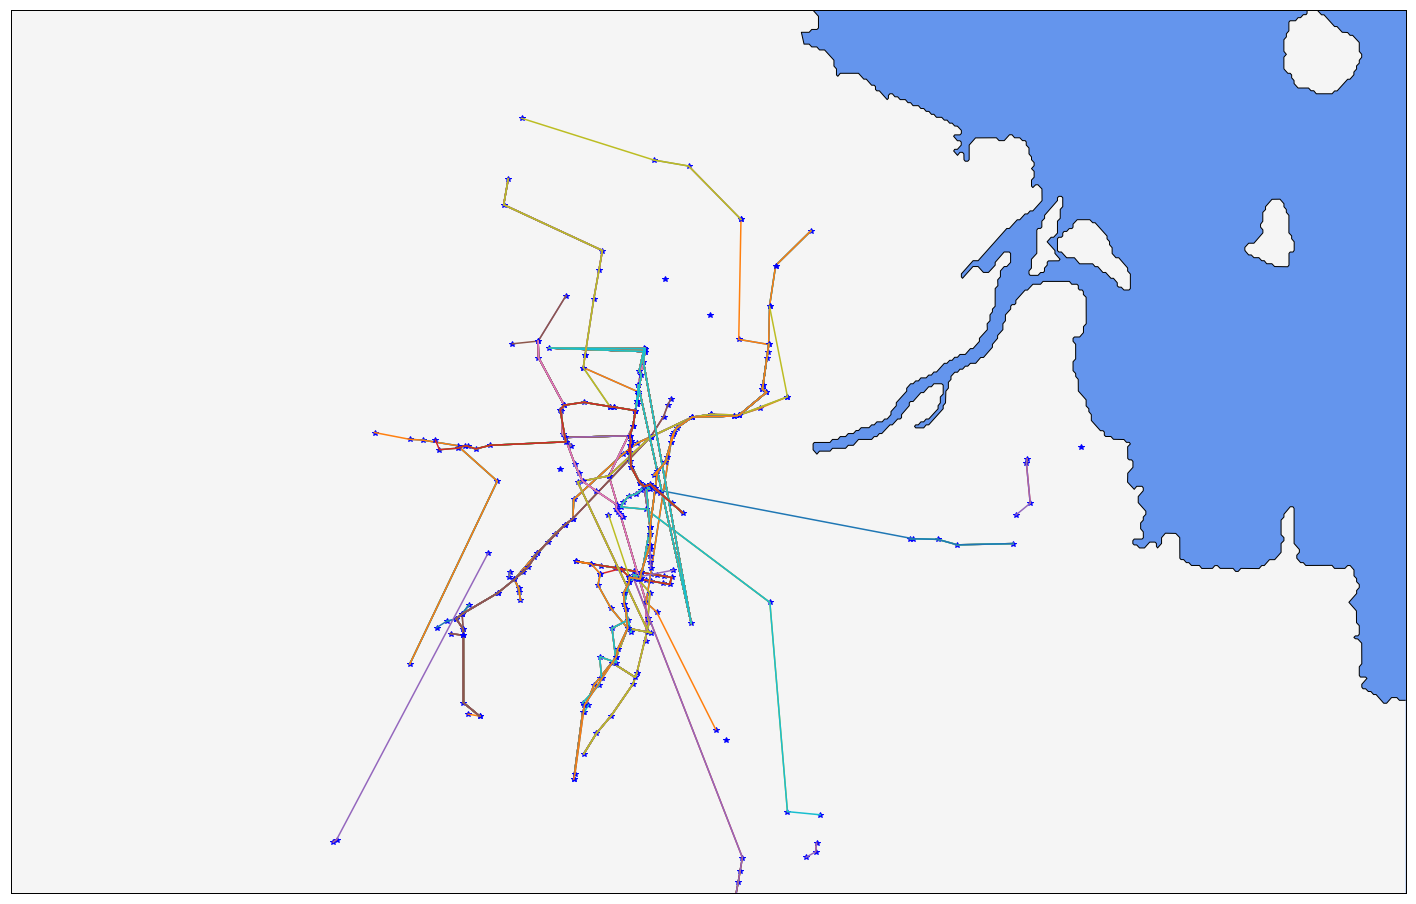

In [18]:
# Center - lat + long information
# Zoom - smaller is out, larger is in
# llcrnrlat - Lower Left Corner Latitutde
# Brisbane llcrnr (152.98255920410156, -27.51740627799679), urcrnr (153.1212615966797, -27.39920355155297)

# Size of the plot
plt.figure(figsize=(25,25))
m = Basemap(projection='merc', llcrnrlat = -27.575242792800026, llcrnrlon = 152.83081054687497, 
            urcrnrlat = -27.32419501793169, urcrnrlon = 153.27781677246094, resolution='f')

m.drawcoastlines()
m.drawmapboundary(fill_color='cornflowerblue')
m.fillcontinents(color='whitesmoke',lake_color='cornflowerblue')
# m.fillcontinents()
# m.drawcounties()
# m.etopo()

xs = []
ys = []

Result['First Sensor'].astype(str).astype(int)

# Choosing Origin and Destination Zones
# Result =(Result.loc[Result['areaid'].all() == 10352])
# Result =(Result.loc[Result['areaid'].all() == 10699])
# Result =(Result.loc[Result['First SA2 Zone'] == 301031016])
# Result =(Result.loc[Result['Last SA2 Zone'] == 301031016])

if 10352 in Result['areaid']:

num = 1

for value1 in range(0,len(Result)):
    for value2 in range(0,Result['X'].iloc[value1].size):
        x,y = m(Result['X'].iloc[value1][value2], Result['Y'].iloc[value1][value2])
        a,b = m(Result['X'].iloc[value1][value2], Result['Y'].iloc[value1][value2])
        xs.append(x)
        ys.append(y)
#         m.plot(x,y,marker='D', color='r')
        m.plot(a,b, marker='*', color='b')
        m.plot(xs,ys)
    xs.clear()
    ys.clear()

# # To make Basemap work
# # brew install geos
# # pip install -U pip setuptools 
# # sudo pip3 install https://github.com/matplotlib/basemap/archive/master.zip

# Between any two sensors, how many trajectories are there. 
# Between any two, know the travel time.

In [ ]:
print("Fin")

In [ ]:
import folium


m = folium.Map(location=[45.5236, -122.6750])

In [ ]:
# import folium

# xs = []
# ys = []

# m = folium.Map(location=[-27.470505930696984, 153.03405761718747], zoom_start=13)


# locations = df[['X', 'Y']]
# locationlist = locations.values.tolist()
    
# for value1 in range(0,len(locationlist)):
#     folium.Marker(locationlist[value1], popup=df['areaid'][point]).add_to(map)
    
# m

In [ ]:
# locations

In [ ]:
Result =(Result.loc[Result['First Sensor'] == 10506])
Result =(Result.loc[Result['Last Sensor'] == 10558])
Result